In [1]:
import warnings
from os import listdir
from os.path import basename, splitext
from itertools import permutations
from multiprocessing import Pool

from sklearn.preprocessing import StandardScaler
from pandas import DataFrame, read_hdf 
from matplotlib import pyplot as plt

In [2]:
# Settings
warnings.filterwarnings("ignore")
# plt.style.use('ggplot')  # Красивые графики
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = (20, 8)  # Размер картинок

%matplotlib inline

In [3]:
def downsample(dataframe):
    return dataframe.resample('60Min').last()

In [4]:
def to_dataframe(hdf):
    return DataFrame(read_hdf(f"data/hdf/{hdf}"))

In [5]:
def tickername(file):
    return splitext(basename(file))[0]

In [6]:
def load(hdf):
    ticker = tickername(hdf)
    dataframe = to_dataframe(hdf)
    dataframe.columns = [ticker]
    return downsample(dataframe)

In [7]:
# Check data
ethbtc = load('ethbtc.hdf')
ethbtc.head(5)

,ethbtc
Date_Time,
2017-07-14 07:00:00,0.086347
2017-07-14 08:00:00,0.085399
2017-07-14 09:00:00,0.087200
2017-07-14 10:00:00,0.088591
2017-07-14 11:00:00,0.088888


In [8]:
ethbtc.count()

ethbtc    9368
dtype: int64

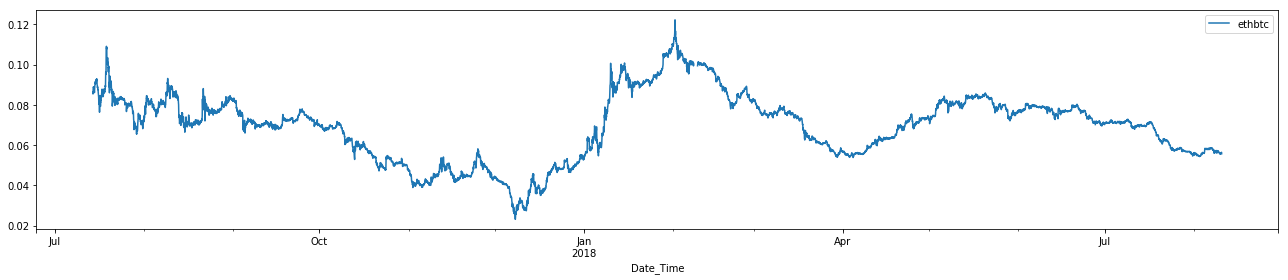

In [9]:
ethbtc.plot(figsize=(18,4))

In [10]:
def get_hdf_files():
    return listdir('data/hdf/')

In [11]:
hdf_files = get_hdf_files()
hdf_files.remove('ethbtc.hdf')
hdf_files

['xrpbtc.hdf',
 'qtumbnb.hdf',
 'omgbtc.hdf',
 'xrpeth.hdf',
 'zeceth.hdf',
 'zrxbtc.hdf',
 'qtumeth.hdf',
 'etcbtc.hdf',
 'xrpbnb.hdf',
 'qtumbtc.hdf',
 'xlmeth.hdf',
 'etcbnb.hdf',
 'zecbtc.hdf',
 'etceth.hdf',
 'omgeth.hdf',
 'neobnb.hdf',
 'dasheth.hdf',
 'ltceth.hdf',
 'bnbbtc.hdf',
 'bnbeth.hdf',
 'neobtc.hdf',
 'adabnb.hdf',
 'xmrbtc.hdf',
 'neoeth.hdf',
 'adaeth.hdf',
 'xmreth.hdf',
 'xlmbnb.hdf',
 'adabtc.hdf',
 'ltcbnb.hdf',
 'zrxeth.hdf',
 'xlmbtc.hdf',
 'ltcbtc.hdf',
 'dashbtc.hdf']

In [12]:
def add(base, tickers): 
    for ticker in tickers:
        base = base.join(ticker)
        base.dropna(inplace=True)
    return base 

In [13]:
tickers = Pool().map(load, hdf_files)
result_dataframe = add(ethbtc, tickers)
result_dataframe.head(3)

,ethbtc,xrpbtc,qtumbnb,omgbtc,xrpeth,zeceth,zrxbtc,qtumeth,etcbtc,xrpbnb,...,neoeth,adaeth,xmreth,xlmbnb,adabtc,ltcbnb,zrxeth,xlmbtc,ltcbtc,dashbtc
Date_Time,,,,,,,,,,,,,,,,,,,,,
2018-06-12 05:00:00,0.077528,0.000086,0.77842,0.001427,0.001110,0.38827,0.000150,0.022680,0.002262,0.03823,...,0.085794,0.000334,0.25562,0.01615,0.000026,6.91,0.001937,0.000036,0.015566,0.038798
2018-06-12 06:00:00,0.077175,0.000086,0.77324,0.001413,0.001110,0.38968,0.000149,0.022889,0.002242,0.03720,...,0.085491,0.000332,0.25553,0.01588,0.000026,6.75,0.001940,0.000036,0.015446,0.039055
2018-06-12 07:00:00,0.077697,0.000086,0.76153,0.001405,0.001104,0.38883,0.000150,0.022943,0.002296,0.03678,...,0.084802,0.000330,0.25376,0.01564,0.000026,6.69,0.001932,0.000036,0.015618,0.038967


In [14]:
def ration(df):
    for ticker in df.columns:
        df[ticker] = StandardScaler().fit_transform(
            df[ticker].values.reshape(-1, 1))
    return df 

In [15]:
ration_dataframe = ration(result_dataframe)
ration_dataframe.head(3)

,ethbtc,xrpbtc,qtumbnb,omgbtc,xrpeth,zeceth,zrxbtc,qtumeth,etcbtc,xrpbnb,...,neoeth,adaeth,xmreth,xlmbnb,adabtc,ltcbnb,zrxeth,xlmbtc,ltcbtc,dashbtc
Date_Time,,,,,,,,,,,,,,,,,,,,,
2018-06-12 05:00:00,1.315797,1.804590,2.380457,1.534198,2.173736,-0.407647,0.773333,2.475940,-0.481585,1.754833,...,2.272431,0.461069,-1.203284,-0.283944,1.930592,1.785112,-0.377464,0.739400,2.112015,0.971302
2018-06-12 06:00:00,1.270867,1.749543,2.312375,1.472052,2.173736,-0.372779,0.727885,2.587676,-0.570369,1.351413,...,2.217481,0.357196,-1.207897,-0.356667,1.787722,1.472555,-0.370322,0.712635,2.036895,1.032930
2018-06-12 07:00:00,1.337308,1.767200,2.158466,1.436539,2.026716,-0.393799,0.797572,2.616545,-0.330653,1.186912,...,2.092528,0.290920,-1.298638,-0.421310,1.823440,1.355346,-0.391801,0.719326,2.144567,1.011828


In [16]:
corr = ration_dataframe.corr()
corr.head()

,ethbtc,xrpbtc,qtumbnb,omgbtc,xrpeth,zeceth,zrxbtc,qtumeth,etcbtc,xrpbnb,...,neoeth,adaeth,xmreth,xlmbnb,adabtc,ltcbnb,zrxeth,xlmbtc,ltcbtc,dashbtc
ethbtc,1.000000,0.969041,0.628947,0.969967,0.479029,-0.889461,-0.212024,0.843076,0.432843,0.206315,...,0.521097,-0.500802,-0.655411,-0.744275,0.753045,0.034347,-0.796515,-0.410835,0.955904,0.959643
xrpbtc,0.969041,1.000000,0.604865,0.963099,0.678728,-0.835404,-0.274923,0.889058,0.338596,0.200625,...,0.518847,-0.492561,-0.637557,-0.759753,0.731796,0.008502,-0.815332,-0.391685,0.977023,0.946272
qtumbnb,0.628947,0.604865,1.000000,0.702027,0.257791,-0.510427,0.264648,0.779836,0.068860,0.807605,...,0.812438,0.177622,-0.203044,-0.052797,0.845073,0.750408,-0.261131,0.108669,0.669986,0.695520
omgbtc,0.969967,0.963099,0.702027,1.000000,0.532934,-0.813719,-0.208307,0.919281,0.283959,0.258339,...,0.590218,-0.367117,-0.606645,-0.666436,0.820858,0.116848,-0.770972,-0.305158,0.970385,0.969204
xrpeth,0.479029,0.678728,0.257791,0.532934,1.000000,-0.358674,-0.342842,0.626045,-0.030946,0.103529,...,0.294195,-0.306711,-0.302233,-0.509604,0.336981,-0.094409,-0.534723,-0.206643,0.621364,0.510691


In [17]:
def plot_corr(corr, size=10):
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    ticks = range(len(corr.columns))
    plt.xticks(ticks, corr.columns, rotation='vertical')
    plt.yticks(ticks, corr.columns)

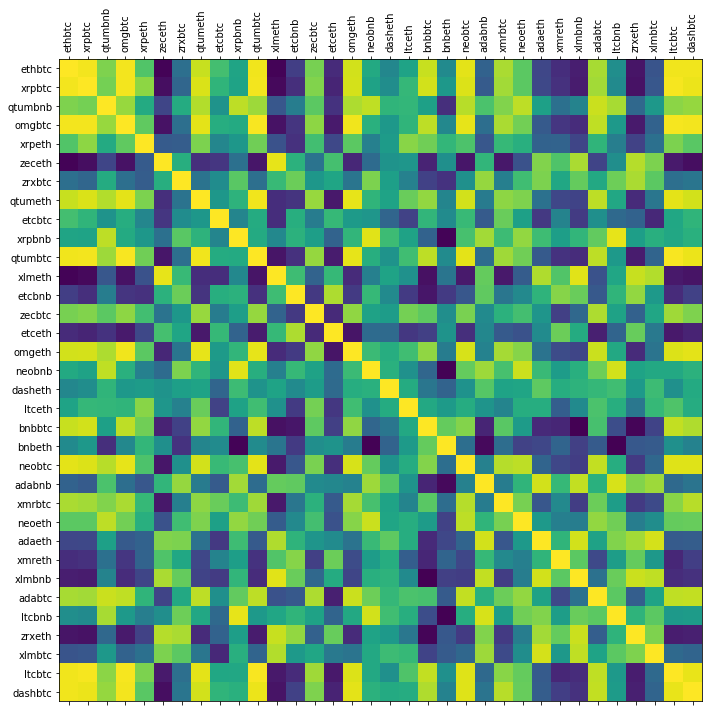

In [18]:
plot_corr(corr)